<a href="https://colab.research.google.com/github/shubham2904/Crime-Analysis-and-Prediction/blob/main/existing_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###### decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv('/content/communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)

In [ ]:
pos=df[(df['highCrime'] == 1)]
pos_percentage=len(pos)/len(df)
neg_percentage=1-pos_percentage
print('positive instance percentage is ',pos_percentage)
print('negative instance percentage is ',neg_percentage)

positive instance percentage is  0.6271951831409934
negative instance percentage is  0.37280481685900657


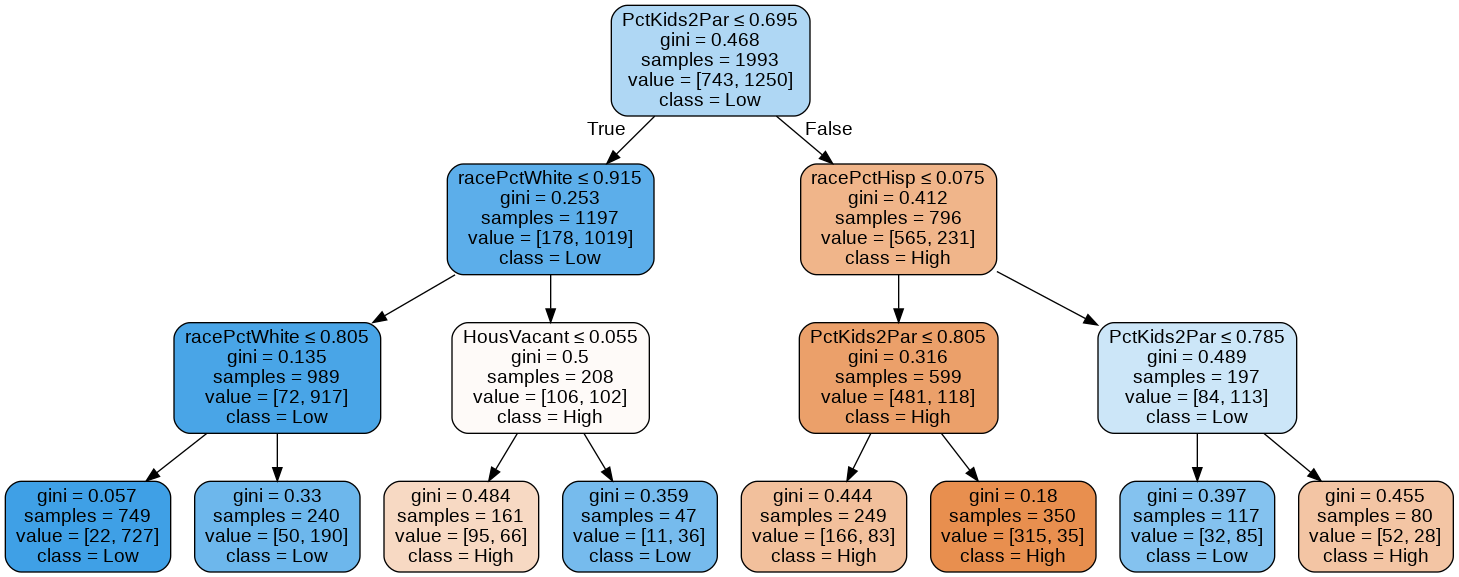

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
initial=pd.read_csv('communities-crime-clean.csv')
initial = initial.drop('communityname', 1)
initial = initial.drop('ViolentCrimesPerPop', 1)
initial = initial.drop('fold', 1)

initial = initial.drop('state', 1)
Y = df['highCrime']
clf = tree.DecisionTreeClassifier(max_depth=3)
# clf = tree.DecisionTreeClassifier()
clf = clf.fit(initial, Y)
clf
y_pred = clf.predict(initial)
list(initial)
feature_name=list(initial)
import pydotplus 
from IPython.display import Image 
classname=['High','Low']
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(initial),  
                         class_names=classname,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [ ]:
fold=df['fold']
scores = cross_val_score(clf, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores) 
print('cross_val_accuracy_avg is ',np.array(scores).mean()) 
scores = cross_val_score(clf, initial, Y,fold,'precision',10)
print('cross_val_precision is ',scores) 
print('cross_val_precision_avg is ',np.array(scores).mean()) 
scores = cross_val_score(clf, initial, Y,fold,'recall',10)
print('cross_val_recall is ',scores) 
print('cross_val_recall_avg is ',np.array(scores).mean())

cross_val_accuracy is  [0.79       0.875      0.83       0.84924623 0.65326633 0.75879397
 0.84924623 0.7839196  0.79396985 0.79899497]
cross_val_accuracy_avg is  0.7982437185929648
cross_val_precision is  [0.78231293 0.85211268 0.84210526 0.88       0.75454545 0.88118812
 0.85185185 0.94565217 0.79166667 0.85123967]
cross_val_precision_avg is  0.8432674799594686
cross_val_recall is  [0.92  0.968 0.896 0.88  0.664 0.712 0.92  0.696 0.912 0.824]
cross_val_recall_avg is  0.8392


In [ ]:
from sklearn.metrics import accuracy_score
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
from sklearn.metrics import precision_score
print ('Precesion is', precision_score(Y,y_pred)*100)
from sklearn.metrics import recall_score
print ('Recall is', recall_score(Y,y_pred)*100)


Accuracy is 83.59257400903161
Precesion is 90.02601908065915
Recall is 83.04


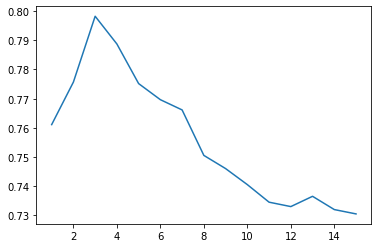

 [0.7611130653266331, 0.7756934673366834, 0.7982437185929648, 0.7887386934673367, 0.7751683417085428, 0.7696532663316582, 0.7661432160804019, 0.7505628140703517, 0.7460452261306533, 0.7405527638190955, 0.734532663316583, 0.7330226130653266, 0.7365452261306533, 0.7320025125628141, 0.7305125628140703]


In [ ]:
y=[]
x=[]
for i in range (1,16):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(initial, Y)
    y_pred = clf.predict(initial)
    scores = cross_val_score(clf, initial, Y,None,'accuracy',cv=10)
    y.append(np.array(scores).mean())
    x.append(i)

    
plt.plot(x, y)

plt.show()

print('',y)

According to the plot above, we can get the best number of max_depth feeding in DecisionTreeClassifier. With the increasing number of max_depth, the mean of cross_val_score_accuracy keeps growing up and then starts to decline on number 3.
Therefore, max_depth =3 in DecisionTreeClassifier can get the best performance to analyze the dataset.
We pick at most four biggest information gain in feature_importances array, which is used gini method to calculate and then get four features shown below.


In [ ]:
feature_selection = clf.feature_importances_ 
   

ind = np.argpartition(feature_selection, -4)[-4:]

print('ind is ',ind)
print('4_max_normalized_feature is ',feature_selection[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])

ind is  [29 44  5  3]
4_max_normalized_feature is  [0.02464305 0.35865224 0.04858536 0.08789118]
29
feature_name[index] is  PctLess9thGrade
44
feature_name[index] is  PctKids2Par
5
feature_name[index] is  racePctHisp
3
feature_name[index] is  racePctWhite


Because cross-validation requires that we train on a reduced size dataset and then test on data we did not train against the average accuracy, precision and recall scores drop compared with the full dataset train and test.



In [ ]:
#### naive bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(initial, Y).predict(initial)

print("mislabel num is ",(Y != y_pred).sum())

# print ('sigma is ',gnb.sigma_)
variance=gnb.sigma_
stand_deviation =np.sqrt( variance)
# print('standard deviation is',stand_deviation);
sum_standard=stand_deviation[0]+stand_deviation[1]
# print('sum of standard deviation is',sum_standard);

# print ('theta is ',gnb.theta_)
mean=gnb.theta_
difference=mean[0]-mean[1]
# print('difference is ',abs(difference))
normalized_feature=abs(difference)/sum_standard
# print('normalized_feature is ',normalized_feature)


ind = np.argpartition(normalized_feature, -10)[-10:]

print('ind is ',ind)
print('10_max_normalized_feature is ',normalized_feature[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])





from sklearn.model_selection import cross_val_score
fold=df['fold']
scores = cross_val_score(gnb, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores) 
print('cross_val_accuracy_avg is ',np.array(scores).mean()) 
scores = cross_val_score(gnb, initial, Y,fold,'precision',10)
print('cross_val_precision is ',scores) 
print('cross_val_precision_avg is ',np.array(scores).mean()) 
scores = cross_val_score(gnb, initial, Y,fold,'recall',10)
print('cross_val_recall is ',scores) 
print('cross_val_recall_avg is ',np.array(scores).mean())
from sklearn.metrics import accuracy_score
print ('Accuracy is', accuracy_score(Y,y_pred)*100)



mislabel num is  442
ind is  [38 44 45 41 15 46 50  3 43 40]
10_max_normalized_feature is  [0.61686366 0.80974842 0.66500857 0.67464461 0.66107643 0.64294945
 0.70926105 0.73522995 0.74554481 0.69397809]
38
feature_name[index] is  MalePctDivorce
44
feature_name[index] is  PctKids2Par
45
feature_name[index] is  PctYoungKids2Par
41
feature_name[index] is  TotalPctDiv
15
feature_name[index] is  pctWInvInc
46
feature_name[index] is  PctTeen2Par
50
feature_name[index] is  PctIlleg
3
feature_name[index] is  racePctWhite
43
feature_name[index] is  PctFam2Par
40
feature_name[index] is  FemalePctDiv
cross_val_accuracy is  [0.775      0.8        0.825      0.79899497 0.70351759 0.65326633
 0.81407035 0.73366834 0.71356784 0.79899497]
cross_val_accuracy_avg is  0.761608040201005
cross_val_precision is  [0.86363636 0.92929293 0.95       0.92079208 0.94594595 0.86842105
 0.92307692 1.         0.77868852 0.93814433]
cross_val_precision_avg is  0.9117998148278733
cross_val_recall is  [0.76  0.736 0.7

Naive Bayes on average has worse accuracy and recall than Decision Tree on the dataset.  This is likely due to correlations between features in the dataset that by definition the Naive Bayes classifier assumes are conditionally independent. Interestingly, both find PctKids2Par to be the most predictive feature.


In [ ]:
########## linear svc

In [ ]:
from sklearn import svm
lin_svc = svm.LinearSVC(C=0.01447, penalty="l1", dual=False).fit(initial, Y)
# using L1-norm (sparsity method) to make unless feature weight become 0 , C value increase->more complex model having more weight
feature_weight=abs(lin_svc.coef_[0])
print("",feature_weight)
for i in range(0,len(feature_weight)):
    if(feature_weight[i]!=0):
        print('select_feature_is ',feature_name[i], ' feature_weight is ', feature_weight[i])


from sklearn.model_selection import cross_val_score
fold=df['fold']
scores = cross_val_score(lin_svc, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores) 
print('cross_val_accuracy_avg is ',np.array(scores).mean()) 
scores = cross_val_score(lin_svc, initial, Y,fold,'precision',10)
print('cross_val_precision is ',scores) 
print('cross_val_precision_avg is ',np.array(scores).mean()) 
scores = cross_val_score(lin_svc, initial, Y,fold,'recall',10)
print('cross_val_recall is ',scores) 
print('cross_val_recall_avg is ',np.array(scores).mean()) 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 [0.         0.         0.15565435 0.60457883 0.         0.30726866
 0.         0.         0.         0.         0.         0.08594123
 0.         0.         0.         0.02754349 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.0881123  1.45919212
 0.         0.         0.5815404  0.         0.         0.
 0.         0.         0.30143416 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.15496813 0.10562785 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.15680954 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.      

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

cross_val_accuracy is  [0.775      0.875      0.87       0.85427136 0.73366834 0.70351759
 0.77386935 0.85427136 0.83417085 0.79899497]
cross_val_accuracy_avg is  0.8072763819095478


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

cross_val_precision is  [0.75316456 0.84722222 0.88372093 0.86153846 0.90909091 0.81730769
 0.78169014 0.96153846 0.81506849 0.81021898]
cross_val_precision_avg is  0.8440560845990275


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

cross_val_recall is  [0.944 0.968 0.912 0.904 0.64  0.672 0.88  0.8   0.952 0.888]
cross_val_recall_avg is  0.8560000000000001
Accuracy is 77.82237832413446


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In this method of estimating predictive features, we use L1-norm to be a penalty in LinearSVC. L1 is known as least absolute errors to compute the penalty value to be used for adjusting the model. It has a sparsity property that reduces the coeficients for features that are not predictive to zero removing them from the model adjustment calculations. 

The Penalty value, C, represents the degree of model complexity. We tuned C to a low value to pick out at most 11 predictive features. This can be achieved because the L1 model is more likely to reduce coefficients of features to zero when a lower C value is set. racePctWhite, racePctHisp, PctKids2Par, PctIlleg, FemalePctDiv and TotalPctDiv are all consistent features with the previous models. PctPersDenseHous, pctWPubAsst, racepctblack and pctUrban have not been predictive in previous models but they also have low coefficients in the LinearSVC model, so they choices of these features by the model is somewhat arbitrary as they will only contribute slight adjustments to the model to correct for errors.

In comparison with DecisionTree, LinearSVC improves accuracy, precision and recall for this dataset. This could be explained by the fact that LinearSVC is able to find an optimal linear sepparating hyperplane for the dataset, while Decision Tree is only able to use axis alligned planes to splint in a heirarchical fashion to split the dataset. Interestingly LinearSVC has a different most predictive feature than the previous models, TotalPctDiv. PctKids2Par is the second most predictive feature for LinearSVC, so it still maintains high importance. This likely means that TotalPctDiv is more effective as a linear sepparator with non-axis aligned planes.


In [ ]:
####### PCA 

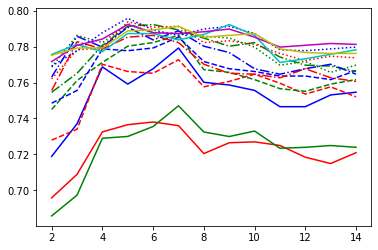

In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

df=pd.read_csv('communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
initial=pd.read_csv('communities-crime-clean.csv')
Y = df['highCrime']
fold=df['fold']
state=df['state']
community=df['communityname']
initial = initial.drop('fold', 1)
initial = initial.drop('state', 1)
initial = initial.drop('communityname', 1)
initial = initial.drop('ViolentCrimesPerPop', 1)

x=[]
y=[]
for k in range (1,16):
    y.append([])
for i in range (2,15):
    pca = PCA(n_components=i)
    pca.fit(initial)
    pcdf = pca.transform(initial)
    for j in range (1,16):
        knn = KNeighborsClassifier(j)
        knn.fit(pcdf,Y)
        scores = cross_val_score(knn,pcdf,Y,fold,'accuracy',10)
        y[j-1].append(np.mean(scores))
    x.append(i)

plt.plot(x,y[0],'r-',
         x,y[1],'g-',
         x,y[2],'b-',
         x,y[3],'r--',
         x,y[4],'g--',
         x,y[5],'b--',
         x,y[6],'r-.',
         x,y[7],'g-.',
         x,y[8],'b-.',
         x,y[9],'r:',
         x,y[10],'g:',
         x,y[11],'b:',
         x,y[12],'c-',
         x,y[13],'m-',
         x,y[14],'y-')
plt.show()

X-axis is number of components
Y-axis is accuracy
Red-solid-line is k=1
Green-solid-line is k=2
Blue-solid-line is k=3
Red-dashed-line is k=4
Green-dashed-line is k=5
Blue-dashed-line is k=6
Red-dash-dot-line is k=7
Green-dash-dot-line is k=8
Blue-dash-dot-line is k=9
Red-dotted-line is k=10
Green-dotted-line is k=11
Blue-dotted-line is k=12
Cyan-solid-line is k=13
Magenta-solid-line is k=14
Yellow-solid-line is k=15

In [ ]:
pca = PCA(n_components=5)
pca.fit(initial)
pca.components_

array([[-2.04052546e-02,  9.75132690e-03, -1.28371329e-01,
         1.23044608e-01,  6.52084194e-02, -6.14280591e-02,
        -4.72820587e-02, -4.60121765e-02, -4.71777648e-02,
        -3.46626378e-02, -1.56537431e-02,  1.52570830e-01,
         1.88492101e-01,  1.03286139e-01, -7.18548440e-03,
         1.48691465e-01, -6.12543207e-02, -1.73401439e-01,
         4.48956257e-03,  1.79662679e-01,  1.61193740e-01,
         1.40327609e-01,  1.07194806e-01,  4.39239209e-02,
         8.19922061e-02,  7.74816512e-02,  1.13058167e-01,
        -3.97531389e-02, -1.91357751e-01, -1.50661446e-01,
        -1.59431939e-01,  1.42844505e-01, -1.52692314e-01,
         1.10214847e-01, -2.33208904e-02,  1.61083945e-02,
        -1.34972468e-01,  1.35500286e-01, -1.06437345e-01,
        -4.01754009e-02, -1.01677202e-01, -1.09737150e-01,
        -1.29668589e-02,  1.62749424e-01,  1.68736871e-01,
         1.78676474e-01,  1.33751535e-01, -1.18987095e-02,
         1.12613742e-02, -3.11151955e-02, -1.50870947e-0

In [ ]:
pca.explained_variance_ratio_

array([0.26753256, 0.1879639 , 0.08245766, 0.07097958, 0.04612133])

In [ ]:
pcdf = pca.transform(initial)
pcdf

array([[ 0.42940989, -0.53929962,  0.31031454,  0.61492902, -0.78039948],
       [-1.19933196, -0.90092286,  0.31801595,  0.0657861 ,  0.08519057],
       [-1.25540273, -0.45223119, -0.37326947, -0.57765153, -0.34191733],
       ...,
       [-0.39828125, -0.04847062, -0.72054899,  1.84903699,  0.50341963],
       [-0.06739216, -0.87415147,  0.57794266,  0.14245353, -0.03894161],
       [-0.53794345, -0.94270676, -0.04992509,  0.22885668,  0.5167595 ]])

# k-nn


In [ ]:
from sklearn.metrics import f1_score
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(pcdf,Y)
y_pred = knn.predict(pcdf)
print ('fl score is', f1_score(Y,y_pred,average="binary")*100)
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
print ('Precision is', precision_score(Y,y_pred)*100)
print ('Recall is', recall_score(Y,y_pred)*100)

fl score is 87.0279146141215
Accuracy is 84.14450577019569
Precision is 89.3760539629005
Recall is 84.8


In [ ]:
scores = cross_val_score(knn,pcdf,Y,fold,'accuracy',10)
print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(knn,pcdf,Y,fold,'precision',10)
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(knn,pcdf,Y,fold,'recall',10)
print ('Cross validation recall is', np.mean(scores)*100)

Cross validation accuracy is 79.57286432160804
Cross validation precision is 85.35884460774638
Cross validation recall is 81.60000000000001



K-nn is a grouping method using distance as the most important factor for classification of data. This combined with the loss of specific features in PCA dimensionality reduction makes finding reliable predictive features very difficult.

Thus the best estimator of predictive features is the greatest magnitude features of the eigenvector that captures the largest percentage of variance in the dataset.




In [ ]:

ind = np.argpartition(pca.components_[0], -10)[-10:]

print('ind is ',ind)
print('10_max_vector_components is ',pca.components_[0][ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('vector_component[index] is ',feature_name[index])


ind is  [83 84 80 19 45 44 81 82 85 12]
10_max_vector_components is  [0.16356539 0.19320424 0.16436957 0.17966268 0.17867647 0.16873687
 0.16398596 0.16706879 0.16710099 0.1884921 ]
83
vector_component[index] is  RentMedian
84
vector_component[index] is  RentHighQ
80
vector_component[index] is  OwnOccMedVal
19
vector_component[index] is  medFamInc
45
vector_component[index] is  PctYoungKids2Par
44
vector_component[index] is  PctKids2Par
81
vector_component[index] is  OwnOccHiQuart
82
vector_component[index] is  RentLowQ
85
vector_component[index] is  MedRent
12
vector_component[index] is  medIncome


PCA to K-NN results are similar to Decision Tree.  The most significant features are vastly different from the other methods implemented in this project, this is likely because they aren't derived from a classification algorithm but from the features with greatest variance in a dimensionality reduction algorithm.

